In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xtrack as xt
import xpart as xp
import xobjects as xo
import json
from pathlib import Path

In [3]:
directory = Path("/eos/user/l/lpauwels/sps_simulations/archive/MomentumAcceptance/tidp_bump_scan/studies_results/")
files = [f for f in directory.iterdir() if f.is_file()]

In [4]:
turns = {}
cum_losses = {}
bumps = []
max_particles = 1_000_000
for file in files:
    bump_name = file.stem
    with open(file, 'r') as fid:
        part = json.load(fid)
    bumps.append(bump_name)
    t, c = np.unique(part['at_turn'], return_counts=True)
    turns[bump_name] = t
    cum_losses[bump_name] = 1 - np.cumsum(c)/max_particles

In [ ]:
bump_values = [float(bump.split('m')[1]) for bump in bumps if bump != 'bp0.0mm']

norm = plt.Normalize(min(bump_values), max(bump_values))
cmap = plt.cm.plasma

In [ ]:
def get_floating_bump_val(bump_name):
    if 'bm' == bump_name[:2]:
        bump_val = float(bump_name.split('m')[1])
    else:
        bump_val = float(bump_name.split('p')[1].split('m')[0])
    return bump_val

10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
0.0


In [15]:
bump_values = [float(bump.split('m')[1]) for bump in bumps if bump != 'bp0.0mm']
norm = plt.Normalize(min(bump_values), max(bump_values))
cmap = plt.cm.plasma
colors = {bump : cmap(norm(get_floating_bump_val(bump))) for bump in bumps if bump != 'bp0.0mm'}
colors['bp0.0mm'] = 'green'

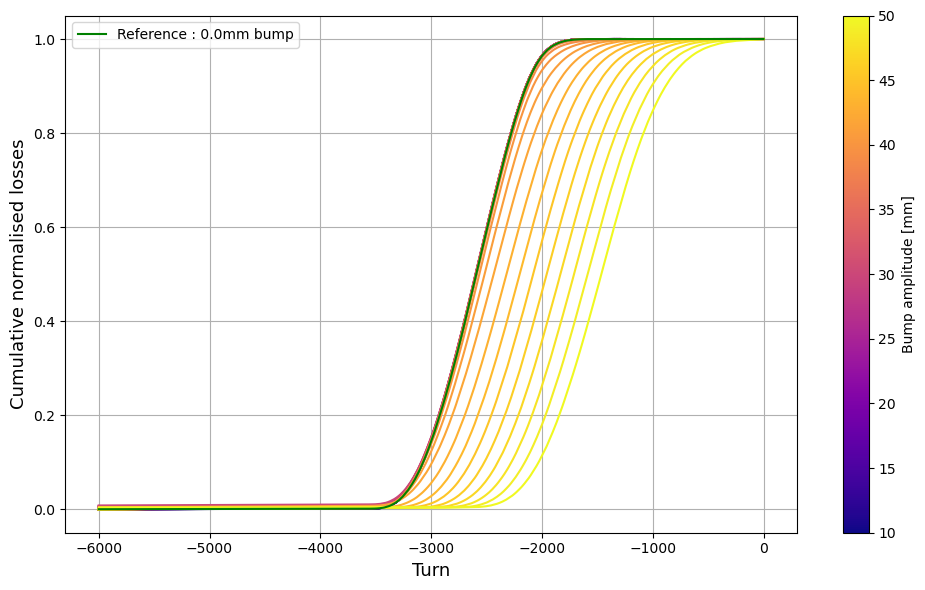

In [24]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
max_particles = 1_000_000

for bump in bumps:
    if bump == 'bp0.0mm':
        ax.plot(- turns[bump], cum_losses[bump], color=colors[bump], label = 'Reference : 0.0mm bump')
    else:
        ax.plot(- turns[bump], cum_losses[bump], color=colors[bump])

ax.grid()
ax.set_xlabel('Turn', fontsize=13)
ax.set_ylabel('Cumulative normalised losses', fontsize=13)
ax.legend()
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array for colorbar

cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Bump amplitude [mm]")

fig.tight_layout()
plt.savefig('Radial_steering_neg_bump.pdf', dpi=300)

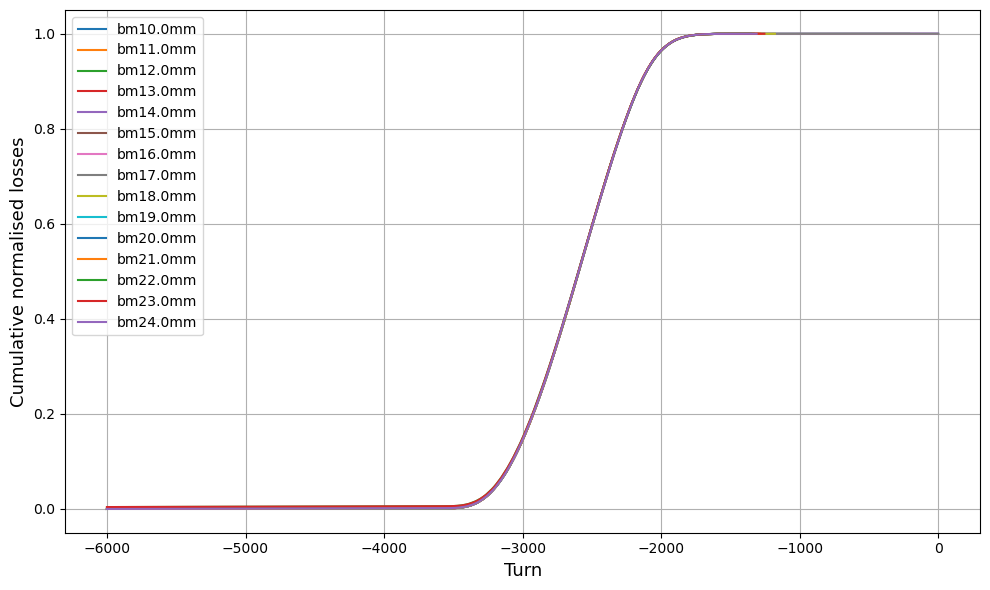

In [ ]:
#OLD
# particles_dictionary = {}
# context = xo.ContextCpu()

# for file in files[15:]:
#     bump_name = file.stem
#     with open(file, 'r') as fid:
#         particles_dictionary[bump_name] = json.load(fid)
# bumps = list(particles_dictionary.keys())
# fig, ax = plt.subplots(1,1,figsize=(10,6))
# max_particles = 1_000_000
# for bump in bumps:
#     turns, counts = np.unique(particles_dictionary[bump]['at_turn'], return_counts=True)
#     ax.plot(- turns, 1 - np.cumsum(counts)/max_particles, label=bump)
# ax.legend(fontsize=10)
# ax.grid()
# ax.set_xlabel('Turn', fontsize=13)
# ax.set_ylabel('Cumulative normalised losses', fontsize=13)
# fig.tight_layout()
# plt.savefig('Radial_steering_neg_bump.pdf', dpi=300)

In [ ]:
reference = particles_dictionary[bumps[0]]['at_turn']

# Compare all others to the reference
for bump in bumps[1:]:
    if particles_dictionary[bump]['at_turn'] != reference:
        print(f"❌ {bump} is different from {bumps[0]}")
    else:
        print(f"✅ {bump} is identical")


❌ bm11.0mm is different from bm10.0mm
❌ bm12.0mm is different from bm10.0mm
❌ bm13.0mm is different from bm10.0mm
❌ bm14.0mm is different from bm10.0mm
❌ bm15.0mm is different from bm10.0mm
❌ bm16.0mm is different from bm10.0mm
❌ bm17.0mm is different from bm10.0mm
❌ bm18.0mm is different from bm10.0mm
❌ bm19.0mm is different from bm10.0mm
❌ bm20.0mm is different from bm10.0mm
❌ bp0.0mm is different from bm10.0mm


In [ ]:
line = xt.Line.from_json('../../injection_lines/sps_with_aperture_inj_q20_beam_sagitta2.json')

Loading line from dict:   0%|          | 0/36395 [00:00<?, ?it/s]

Done loading line from dict.           


In [ ]:
elems = []
for bump in bumps:
    elems_bump = np.unique(particles_dictionary[bump]['at_element'])
    for e in elems_bump:
        if e not in elems:
            elems.append(e)


In [ ]:
for e in elems:
    print(line.element_names[e])

sps$start
vcak.12501.a_aper
bpcn.12508.a_aper
veqa.21910.a_aper
drift_1489..2
drift_1675..1
veqa.21910.b_aper
drift_1728..4


No one dies in the tidp, which explains the lack of effect of it ?